In [13]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
import utils

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
## Importo archivo
df_data = pd.read_parquet('../data/data_export_api.parquet')
df_data.head()

,release_anio,genres,playtime_forever,user_id,item_id,item_name,sentiment_analysis,reviews_recommend,reviews_anio
0,2000,Action,6,76561197970982479,10,Counter-Strike,1,True,2011
1,2000,Action,6,76561197970982479,10,Counter-Strike,2,True,2011
2,2000,Action,6,76561197970982479,10,Counter-Strike,1,True,2011
3,2000,Action,0,js41637,10,Counter-Strike,1,True,2014
4,2000,Action,0,js41637,10,Counter-Strike,1,True,2013


In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11854186 entries, 0 to 11854185
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   release_anio        Int64 
 1   genres              object
 2   playtime_forever    int64 
 3   user_id             object
 4   item_id             int64 
 5   item_name           object
 6   sentiment_analysis  int64 
 7   reviews_recommend   bool  
 8   reviews_anio        Int64 
dtypes: Int64(2), bool(1), int64(3), object(3)
memory usage: 757.4+ MB


In [25]:
# Estadísticas descriptivas

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_data.describe()

,release_anio,playtime_forever,item_id,sentiment_analysis,reviews_anio
count,11773466.00,11854186.00,11854186.00,11854186.00,9766760.00
mean,2012.48,935.13,217581.06,1.21,2014.15
std,3.61,5348.12,123241.51,0.58,0.85
min,1983.00,0.00,10.00,0.00,2010.00
25%,2011.00,0.00,107100.00,1.00,2014.00
50%,2013.00,52.00,236090.00,1.00,2014.00
75%,2015.00,357.00,304050.00,2.00,2015.00
max,2018.00,642773.00,530720.00,2.00,2015.00


release_anio:
    El conjunto de datos contiene juegos lanzados desde 1983 hasta 2018.
    La mayoría de los juegos se lanzaron entre 2011 y 2015, según los percentiles 25%, 50%, y 75%.

playtime_forever:
    La columna playtime_forever tiene una amplia variabilidad, con valores que van desde 0 hasta 642,773.
    El 50% de los juegos tiene un tiempo de juego inferior a 52 minutos, mientras que el 75% tiene un tiempo de juego inferior a 357 minutos.

sentiment_analysis:
    La mayoría de las observaciones tienen valores alrededor de 1 o 2.

reviews_anio:
    La columna reviews_anio tiene reseñas desde el año 2010 hasta el año 2015.
    La mayoría de las reseñas están concentradas en los años 2014 y 2015, según los percentiles 25%, 50%, y 75%.

In [26]:
utils.types_data_df(df_data)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,release_anio,"[<class 'int'>, <class 'pandas._libs.missing.N...",99.32,0.68,80720
1,genres,[<class 'str'>],100.00,0.00,0
2,playtime_forever,[<class 'int'>],100.00,0.00,0
3,user_id,[<class 'str'>],100.00,0.00,0
4,item_id,[<class 'int'>],100.00,0.00,0
5,item_name,[<class 'str'>],100.00,0.00,0
6,sentiment_analysis,[<class 'int'>],100.00,0.00,0
7,reviews_recommend,[<class 'bool'>],100.00,0.00,0
8,reviews_anio,"[<class 'int'>, <class 'pandas._libs.missing.N...",82.39,17.61,2087426


In [27]:
# Reemplazar valores nulos en el DataFrame
df_data = df_data.fillna(value=0)

In [28]:
utils.types_data_df(df_data)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,release_anio,[<class 'int'>],100.00,0.00,0
1,genres,[<class 'str'>],100.00,0.00,0
2,playtime_forever,[<class 'int'>],100.00,0.00,0
3,user_id,[<class 'str'>],100.00,0.00,0
4,item_id,[<class 'int'>],100.00,0.00,0
5,item_name,[<class 'str'>],100.00,0.00,0
6,sentiment_analysis,[<class 'int'>],100.00,0.00,0
7,reviews_recommend,[<class 'bool'>],100.00,0.00,0
8,reviews_anio,[<class 'int'>],100.00,0.00,0


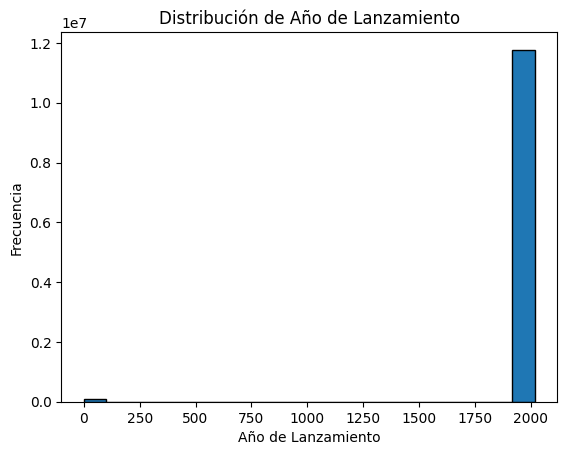

In [30]:
#Visualización de la Distribución de Variables Numéricas:
# Histograma de 'release_anio'
plt.hist(df_data['release_anio'], bins=20, edgecolor='black')
plt.title('Distribución de Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Frecuencia')
plt.show()

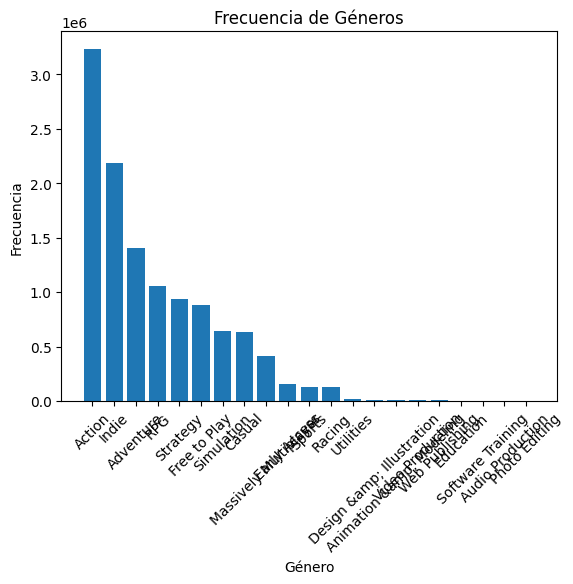

In [33]:
#Visualización de Variables Categóricas:

# Gráfico de barras de 'genres'
plt.bar(df_data['genres'].value_counts().index, df_data['genres'].value_counts())
plt.title('Frecuencia de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

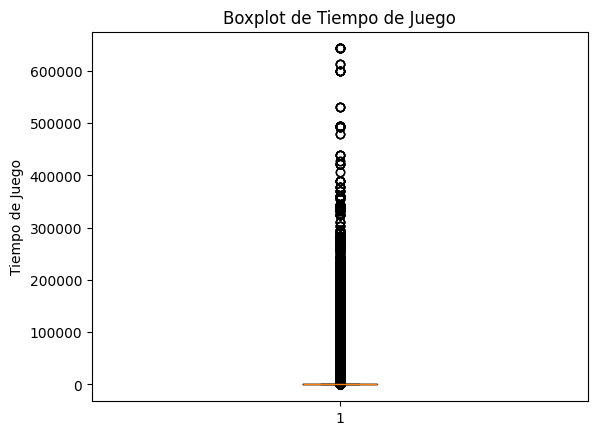

In [34]:
#Identificación de Outliers:
# Boxplot de 'playtime_forever'
plt.boxplot(df_data['playtime_forever'])
plt.title('Boxplot de Tiempo de Juego')
plt.ylabel('Tiempo de Juego')
plt.show()



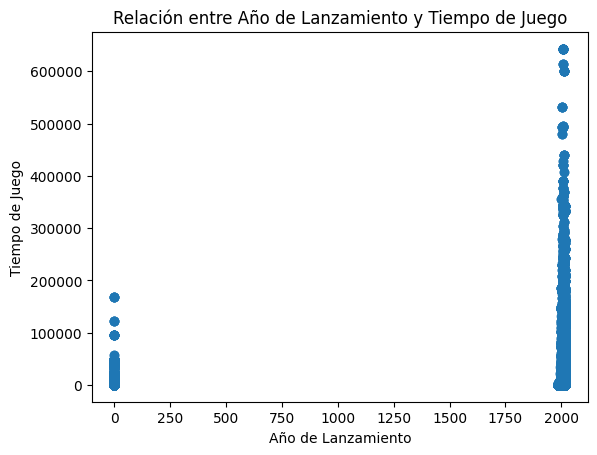

In [36]:
# Gráfico de dispersión entre 'release_anio' y 'playtime_forever'
plt.scatter(df_data['release_anio'], df_data['playtime_forever'])
plt.title('Relación entre Año de Lanzamiento y Tiempo de Juego')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Tiempo de Juego')
plt.show()

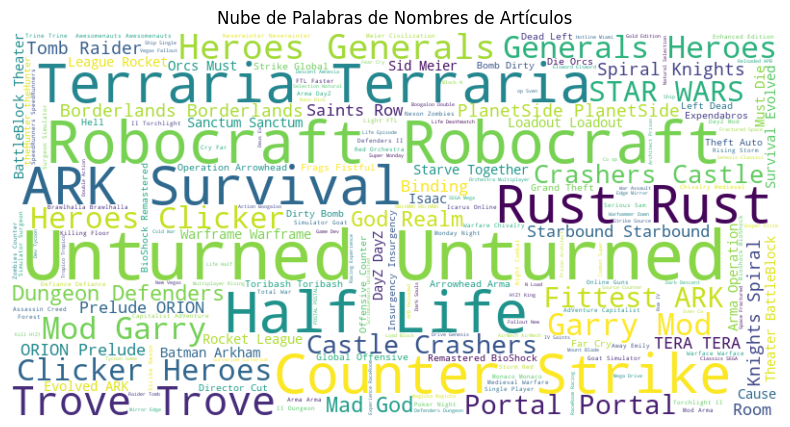

In [39]:
#Nubes de Palabras:
from wordcloud import WordCloud

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_data['item_name']))

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Nombres de Artículos')
plt.show()

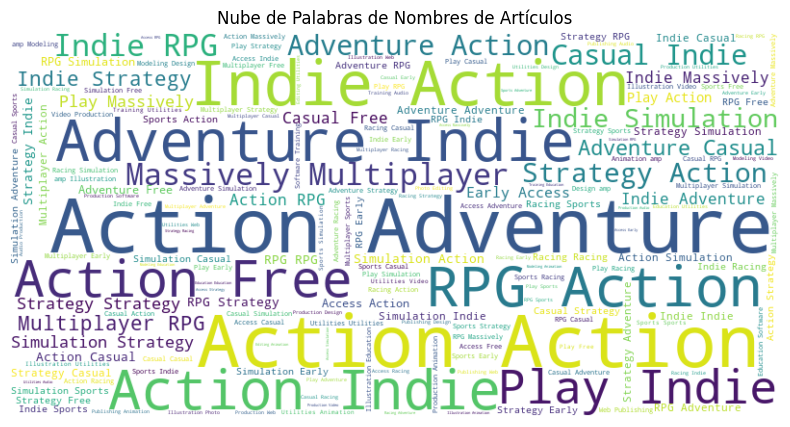

In [40]:
# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_data['genres']))

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Nombres de Artículos')
plt.show()